<a href="https://colab.research.google.com/github/ParthTiwari246/NeuralNetworks/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"partht246","key":"8a4034082aa3d0c5a5ce83ef1fd1cb9a"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.49G/1.49G [00:53<00:00, 25.7MB/s]
100% 1.49G/1.49G [00:53<00:00, 30.0MB/s]


In [6]:
import pandas as pd
import numpy as np
import zipfile
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
plt.style.use('classic')

In [5]:
zipref = zipfile.ZipFile('/content/100-bird-species.zip')
zipref.extractall()
zipref.close()

In [7]:
training_dir = '/content/train'
testing_dir = '/content/test'
val_dir = '/content/valid'

In [8]:
categories = []
files = []
for i in os.listdir(training_dir):
  cat = i
  cat_folder = os.path.join(training_dir, cat)
  nfiles = len(os.listdir(cat_folder))

  categories.append(cat)
  files.append(nfiles)


train_files_df = pd.DataFrame(zip(categories, files), columns=['Category', 'Files'])
total_files = np.sum(train_files_df['Files'].to_numpy())
print(train_files_df)
print('\n')
print(total_files)

               Category  Files
0              ANIANIAU    150
1           CACTUS WREN    122
2         SPLENDID WREN    121
3    CRESTED OROPENDOLA    149
4         INDIAN ROLLER    183
..                  ...    ...
395            RED FODY    167
396           GREEN JAY    156
397      HARLEQUIN DUCK    151
398      INDIGO BUNTING    147
399          BALD EAGLE    160

[400 rows x 2 columns]


58388


In [9]:
categories = []
files = []
for i in os.listdir(testing_dir):
  cat = i
  cat_folder = os.path.join(testing_dir, cat)
  nfiles = len(os.listdir(cat_folder))

  categories.append(cat)
  files.append(nfiles)


test_files_df = pd.DataFrame(zip(categories, files), columns=['Category', 'Files'])
total_files = np.sum(test_files_df['Files'].to_numpy())
print(test_files_df)
print('\n')
print(total_files)

               Category  Files
0              ANIANIAU      5
1           CACTUS WREN      5
2         SPLENDID WREN      5
3    CRESTED OROPENDOLA      5
4         INDIAN ROLLER      5
..                  ...    ...
395            RED FODY      5
396           GREEN JAY      5
397      HARLEQUIN DUCK      5
398      INDIGO BUNTING      5
399          BALD EAGLE      5

[400 rows x 2 columns]


2000


In [10]:
categories = []
files = []
for i in os.listdir(val_dir):
  cat = i
  cat_folder = os.path.join(val_dir, cat)
  nfiles = len(os.listdir(cat_folder))

  categories.append(cat)
  files.append(nfiles)


val_files_df = pd.DataFrame(zip(categories, files), columns=['Category', 'Files'])
total_files = np.sum(val_files_df['Files'].to_numpy())
print(val_files_df)
print('\n')
print(total_files)

               Category  Files
0              ANIANIAU      5
1           CACTUS WREN      5
2         SPLENDID WREN      5
3    CRESTED OROPENDOLA      5
4         INDIAN ROLLER      5
..                  ...    ...
395            RED FODY      5
396           GREEN JAY      5
397      HARLEQUIN DUCK      5
398      INDIGO BUNTING      5
399          BALD EAGLE      5

[400 rows x 2 columns]


2000


(-0.5, 223.5, 223.5, -0.5)

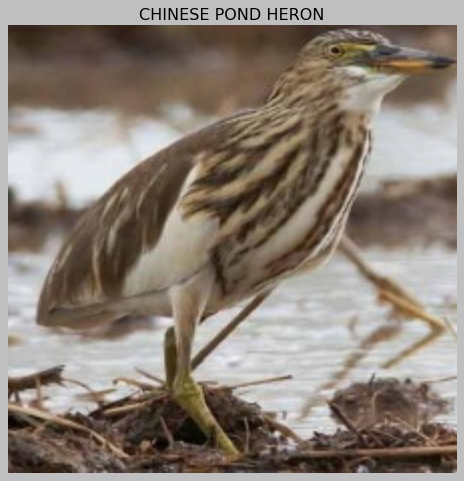

In [11]:
random_cat = random.choice(os.listdir(training_dir))
random_folder = os.path.join(training_dir, random_cat)
random_image = random.choice(os.listdir(random_folder))

img_path = os.path.join(training_dir, random_cat, random_image)
plt.figure(figsize=(13,7))
img = plt.imread(img_path)
plt.title('{}'.format(random_cat))
plt.imshow(img)
plt.axis(False)

In [12]:
train_data = image_dataset_from_directory(directory=training_dir,
                                          label_mode='categorical',
                                          image_size=(224,224))

test_data = image_dataset_from_directory(directory=testing_dir,
                                         label_mode='categorical',
                                         image_size=(224,224))

val_data = image_dataset_from_directory(directory=val_dir,
                                        label_mode='categorical',
                                        image_size=(224,224))

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


In [13]:
output = len(train_data.class_names)
classes = train_data.class_names

In [14]:
inputs = layers.Input(shape=(224,224,3))

x = layers.Conv2D(128, 3, activation='relu')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64, 3)(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32, 3)(x)
x = layers.Flatten()(x)
x = layers.Dense(504, activation='relu')(x)
outputs = layers.Dense(output, activation='softmax')(x)

model = Model(inputs, outputs)

In [15]:
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/3
1825/1825 [==============================] - 236s 122ms/step - loss: 700.1657 - accuracy: 0.0033 - val_loss: 6.0062 - val_accuracy: 0.0025
Epoch 2/3
1825/1825 [==============================] - 227s 125ms/step - loss: 5.9922 - accuracy: 0.0037 - val_loss: 6.0081 - val_accuracy: 0.0025
Epoch 3/3
1825/1825 [==============================] - 230s 126ms/step - loss: 5.9928 - accuracy: 0.0038 - val_loss: 6.0082 - val_accuracy: 0.0025


In [17]:
model.evaluate(test_data)

63/63 [==============================] - 4s 54ms/step - loss: 6.0082 - accuracy: 0.0025


[6.008212089538574, 0.0024999999441206455]

In [18]:
#model accuracy is not very much, let me use a pretrained model

In [19]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [20]:
data_augmentation = Sequential([
    layers.RandomHeight(0.2),
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
])

In [25]:
inputs = layers.Input(shape=(224,224,3))

augmented_inputs = data_augmentation(inputs, training=False)
x = base_model(augmented_inputs, training=True)
x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(400, activation='softmax')(x)
model = Model(inputs, outputs)

In [26]:
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [27]:
history2 = model.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=val_data,
                    validation_steps=len(val_data))

Epoch 1/3
1825/1825 [==============================] - 585s 315ms/step - loss: 4.2891 - accuracy: 0.1475 - val_loss: 2.2859 - val_accuracy: 0.4550
Epoch 2/3
1825/1825 [==============================] - 573s 314ms/step - loss: 2.0402 - accuracy: 0.5185 - val_loss: 1.1985 - val_accuracy: 0.6870
Epoch 3/3
1825/1825 [==============================] - 574s 314ms/step - loss: 1.3413 - accuracy: 0.6689 - val_loss: 0.8366 - val_accuracy: 0.7690
